## 人工智能编程基础（试学班）

## 项目：我的微信好友

在这个notebook文件中，有些模板代码已经提供给你，但你还需要实现更多的功能来完成这个项目。除非有明确要求，你无须修改任何已给出的代码。以**'(练习)'**开始的标题表示接下来的代码部分中有你需要实现的功能。这些部分都配有详细的指导，需要实现的部分也会在注释中以'TODO'标出。请仔细阅读所有的提示。

除了实现代码外，你还**需要**回答一些与项目及代码相关的问题。每个需要回答的问题都会以 **'问题 X'** 标记。请仔细阅读每个问题，并且在问题后的 **'回答'** 部分写出完整的答案。我们将根据 你对问题的回答 和 撰写代码实现的功能 来对你提交的项目进行评分。

>**提示：**Code 和 Markdown 区域可通过 **Shift + Enter** 快捷键运行。此外，Markdown可以通过双击进入编辑模式。

---

### 让我们开始吧

在这个项目中，你将读取微信好友数据，并做一些有趣的统计和分析:P

### 项目内容

我们将这个notebook分为不同的步骤，你将完成以下5个任务：

**任务0 - 读取数据**

**任务1 - 统计微信好友的男女比例**

**任务2 - 分析微信好友的地域分布**

**任务3 - 生成微信好友的签名词云图**

**任务4 - 对签名进行情感分析**

In [1]:
### 配置环境，安装项目所需package，此部分代码只需运行一次即可
### 无需修改以下代码
# !pip install -r requirements.txt
# !conda install -c conda-forge wordcloud --y

---

## 任务0. 登陆并发送打招呼信息

### 导入项目所需包

In [2]:
### 以下内容无需改动，直接运行即可
# 导入项目中所需要的包
import pandas as pd
import re
import os 
import numpy as np
import pinyin
import matplotlib.pyplot as plt
%matplotlib inline

print("所有库导入成功！")

所有库导入成功！


---
**注意：在教室中，我们仅提供假数据来完成项目，如果您倾向于探索自己微信好友的数据，您可以前往此[链接](https://github.com/udacity/AIPND-cn-trial)下载文件，并在本地运行。**

In [3]:
### 以下内容无需改动，直接运行即可
# 读取数据
dataset = pd.read_csv('wechat_friends.csv').fillna('').to_dict('records')

---

---

## 任务1. 好友男女比例

根据我们希望探索的问题，需要从数据集中取出以下几个部分：
- NickName：微信昵称
- Sex：性别，1表示男性，2表示女性
- Province：省份
- City：城市
- Signature：微信签名

### 这个字典列表  dataset 是这个项目中的一个主要数据结构， 我们把它打印出来看看长的什么样子

In [4]:
import pprint
pp = pprint.PrettyPrinter(indent=4, width=140)    
pp.pprint(dataset)

[   {'City': '南京', 'NickName': 'Myself', 'Province': '江苏', 'Sex': 2.0, 'Signature': 'Enjoy<span class="emoji emoji1f49d"></span>'},
    {'City': '南京', 'NickName': 'Hansen', 'Province': '江苏', 'Sex': 1.0, 'Signature': '每一天，为明天。自己是一切的根源！'},
    {'City': '', 'NickName': 'Callie', 'Province': 'Know City', 'Sex': 2.0, 'Signature': '是该去远方放松下了'},
    {'City': '南京', 'NickName': 'Camilla', 'Province': '江苏', 'Sex': 2.0, 'Signature': 'I will love you with every beat of my heart.'},
    {'City': '南京', 'NickName': 'skyfeng', 'Province': '江苏', 'Sex': 1.0, 'Signature': '面朝大海，春暖花开'},
    {'City': '南京', 'NickName': 'Calvin', 'Province': '江苏', 'Sex': 1.0, 'Signature': '农场主'},
    {'City': '南京', 'NickName': 'Xue', 'Province': '江苏', 'Sex': '', 'Signature': '青春是奔流的江河'},
    {'City': '西安', 'NickName': 'Stone', 'Province': '陕西', 'Sex': 1.0, 'Signature': '真正的生活'},
    {'City': '南京', 'NickName': '#', 'Province': '江苏', 'Sex': 1.0, 'Signature': ''},
    {'City': '', 'NickName': 'Caleb', 'Province': 'Firenze', 'Se

#####   1.  列表中的每个元素( 每一行)是一个字典，例如第二条记录如下

 {'City': '南京', 'NickName': 'Hansen', 'Province': '江苏', 'Sex': 1.0, 'Signature': '每一天，为明天。自己是一切的根源！'}
 
#####   2.字典的结构如下
- NickName：微信昵称
- Sex：性别，1表示男性，2表示女性
- Province：省份
- City：城市
- Signature：微信签名

### 练习：打印数据
* 打印`dataset`的数据类型。
* 打印`dataset`中的第一条数据，以及其数据类型。
* 打印`dataset`中第一条数据的微信昵称。

### 提示：
* `print()`函数可以打印括号内的内容。

* `type()`函数可以提取括号内变量的数据类型。

* 对于列表的索引

如果有一个列表`lst`,我想提取它的第三条数据（注意第三条数据和索引2是对应的）：
```python
lst = [1,2,3,4,5]
print(lst[2])
```
输出
```python
3
```

* 对于字典的索引

如果有一个字典`color`,我想根据它的某一个键（key）提取对应值（value）：
```python
color = {'apple':'red','pear':'green','banana':'yellow'}
#这是一个水果对应颜色的字典
#我想获取‘pear’的颜色
print(color['pear'])
```
输出
```python
green
```


In [5]:
### TODO：打印dataset的数据类型
#出题思路： 本题考察的知识点是print语句和内置函数type  
#解题思路：

In [6]:
### TODO：打印第一条数据及数据类型
#出题思路： 本题目考察的知识点是使用索引运算符 s[i]可以访问列表 的元素i
#解题思路：

In [7]:
### TODO：打印第一条数据的微信昵称
#出题思路： 考察的知识点是元素是字典的列表的索引操作(第一层用列表索引，第二层使用字典键值)  
#解题思路： 
#  1.  使用索引运算符 s[i]定位其第一个元素（字典对象）（注意list索引从0开始）
# 2.   使用键值运算符d[key]访问键值是微信昵称 ('NickName')的元素的值 

### **问题2**
dataset的数据类型是什么？dataset中第一条数据的数据类型呢？根据你的理解，这两种数据类型的区别是什么？

回答：（请在这里填写你的回答）

### 练习：统计男女比例
- 统计好友性别，分为男性、女性与未知三种，赋值到已经定义好的`sex`字典中。


### 提示：
- `dataset`中1表示男性、2表示女性，如果不是1也不是2，那就是unknown啦；
- 虽然我们这里没有要求，但是实际的名单中，索引为`0`的实际是自己；
- 本道题目需要使用`for`循环

下面是一个`for`循环示例

```python
#一个城市列表
cities = ['new york city', 'mountain view', 'chicago', 'los angeles']

#循环输出每一个城市的名字
for city in cities:
    print(city)
```
输出会在每一行打印城市名字
```python
new york city
mountain view
chicago
los angeles
```

- 本道题目需要使用`if..elif..else`条件语句

下面是一个条件语句与`for`循环混合示例

我们需要判断num_list中的数字与3和7的大小关系
```python
num_list = [1,5,10]
for num in num_list:
    if num < 3:
        print(num,'这个数字小于3')
    elif 7>=num>=3:
        print(num,'这个数字大于等于3，小于等于7')
    else:
        print(num,'这个数字大于7')
```
输出
```python
1 这个数字小于3
5 这个数字大于等于3，小于等于7
10 这个数字大于7
```

In [8]:
# TODO：统计好友性别
sex = {
    'male': 0,
    'female': 0,
    'unknown': 0
}

sex = {  'male': 0,    'female': 0,    'unknown': 0 }


#出题思路：本题目考察的知识点:   用for语句遍历列表,  if语句 和使用键值运算符d[key]对字典赋值  
#解题思路： 
#1.  用for语句遍历列表 
#2. 访问列表元素(字典对象)对象中键值为‘Sex’（性别）的记录的值 
#3. 根据检查结果(性别分类), 在上面的计数器sex = {  'male': 0,    'female': 0,    'unknown': 0 }(字典)中进行性别统计 , eg  如果if语句判断是男性，则 sex[''male]  +=1

In [9]:
### 以下内容无需改动，直接运行即可
print("我的好友中共有", sex['male'],"位男性、", sex['female'], "位女性，有", sex['unknown'], "位好友未填写。")

我的好友中共有 0 位男性、 0 位女性，有 0 位好友未填写。


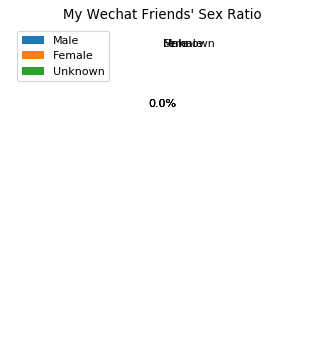

In [10]:
### 以下内容无需改动，直接运行即可
plt.figure(figsize=(8,5), dpi=80)
plt.axes(aspect=1) 
plt.pie([sex['male'], sex['female'], sex['unknown']],
        labels=['Male','Female','Unknown'],
        labeldistance = 1.1,
        autopct = '%3.1f%%',
        shadow = False,
        startangle = 90,
        pctdistance = 0.6 
)

plt.legend(loc='upper left',)
plt.title("My Wechat Friends' Sex Ratio")
plt.show()

这段代码的作用是绘制饼图，是不是很有趣？

**饼状图**是一种常见的单变量图形，用于描绘分类变量级别的相对频率。饼图中的频率用圆形的扇区表示：角度或面积越大，该分类值就越常见。

在「人工智能编程基础」这门课的第二章节中，将讲解如何使用`matplotlib`和`seaborn`绘制各种统计图表，进行数据可视化。

---

## 任务2. 好友地域分布
### 练习：统计好友省份
使用`list`中`append()`方法将好友省份添加至`province`中，注意**要去除空的字符串**




### 提示：
* 可以用`for`循环实现，具体的`for`循环我们已经在上一节实现过了哦，相信聪明的你可以再一次做到的！
* 这里要去除的空字符串，指的是好友省份信息中为空的那些。**空字符串是`''`**，你可以用`==`来判断它。
* `append()`方法应用示例：
```python
lst = ['a','b','c']
lst.append('d')
print(lst)
```
输出
```python 
['a','b','c','d']
```

In [11]:
### TODO：将好友所在省份（不为空）添加到 province 中
province = []

#出题思路：本题目考察的知识点有两个：  
#  1. 用“==”（等于）运算符判断字符串是否为空
# 2.  用列表的append()方法添加新字符串到list
#解题思路：  
#1.  用for语句遍历列表 
#2. 访问列表元素(字典对象)对象中键值为‘Province’（省份）的记录的值 
#3.  用“==”（等于）运算符判断字符串是否为空 
#4.  把‘Province’内容不为空的字符串的值添加到province列表中 

In [12]:
### 以下内容无需修改，直接运行即可
province = [pinyin.get(i, format="strip", delimiter="") for i in province if i != '']

In [2]:
### 以下内容无需修改，直接运行即可
province = pd.DataFrame(province)
province.columns = ['Province']
province['Number of Friends'] = 1
province.groupby('Province').sum().sort_values('Number of Friends', ascending=False)[:10].plot.bar()

**条形图**用于描述分类变量的分布情况。在条形图中，分类变量的每个级别用长条表示，高度表示数据在该级别的出现频率。

---

## 任务3. 生成好友个性签名词云图

在这里我们希望生成词云，只需要调用第三方库即可，Python有大量的库可以使用，能极大提高开发效率，是编程入门的绝佳选择。

### 练习：打印个性签名
* 使用`print()`语句打印出第2条签名
### 提示：
* 列表的索引我们在前面已经实现过了哦，不记得了可以再去看看
* **注意**：索引的2和实际的第2条是有区别的哦！

In [ ]:
### TODO：打印出第2条签名
#出题思路： 考察的知识点是元素是字典的列表的索引操作(第一层用列表索引，第二层使用字典键值)  
#解题思路： 
#  1.  使用索引运算符 s[i]定位其第二个元素（字典对象）（注意list索引从0开始）
# 2.   使用键值运算符d[key]访问键值是签名 ('Signature')的元素的值 

In [ ]:
### 以下内容无需修改，直接运行即可
from wordcloud import WordCloud
import jieba

tList = []
for i in dataset:
    signature = i["Signature"].replace(" ", "").replace("span", "").replace("class", "").replace("emoji", "")
    rep = re.compile("1f\d.+")
    signature = rep.sub("", signature)
    if len(signature) > 0:
        tList.append(signature)
    
text = "".join(tList)

wordlist_jieba = jieba.cut(text, cut_all=True)
wl_space_split = " ".join(wordlist_jieba)

In [ ]:
# 注意下面生成词云的计算比较慢，要4-5分钟左右时间完成

In [ ]:
### 以下内容无需修改，直接运行即可
import PIL.Image as Image

alice_coloring = np.array(Image.open("wechat.jpg"))

my_wordcloud = WordCloud(background_color="white", max_words=2000, mask=alice_coloring,
                         max_font_size=40, random_state=42, font_path='./SimHei.ttf').generate(wl_space_split)


plt.imshow(my_wordcloud)
plt.axis("off")
plt.show()

my_wordcloud.to_file(os.path.join("wechatfriends_wordcloud.png"))

---

## 任务4. 对好友签名进行情感分析

在这部分内容中，我们调用了[SnowNLP](https://github.com/isnowfy/snownlp)的情感分析，它是一个python写的类库，可以方便的处理中文文本内容，不用我们实现其中具体的代码。一般来说，情感分析的目的是为了找出作者观点的态度，是正向还是负向，或者更具体的，我们希望知道他的情绪。

在这里，我们希望了解到好友签名所表达出来的情感是积极的，还是中立、负面的，比如说在以下例子中，我们对"这个商品我非常喜欢，颜色很合我意！"这句话进行了预处理，并通过训练好的模型预测其的情感。

在这里，我们简单地假设大于0.66表示积极，低于0.33表示消极，其他表示中立。

运行以下代码试试看！

---
### 知识小贴士
同学，理解情感分析其实很简单哦！

自然语言处理的很多任务也会应用到机器学习的方法。

我们首先会将问题定位，情感分析到底是一个分类（预测已知情感的类型）还是回归（预测情感强弱的程度），还是聚类（通过算法自动得出情感类型）。

以我们作业中的情感分析为例，这里是一个回归问题，也就是说我们预测的是一个连续的数值，这个数值的强弱决定了情感的强弱。

如果我们把整个情感分析的接口看一个工厂，那么我们输入的文本就是原材料，输出的成品就是情感的强弱度，那么当然机器学习的算法就扮演了加工的角色啦（虽然事实上会复杂很多，不过在初期我们可以简单地这么理解）。

因此，采用什么样的手段来加工我们输入的文本，就能决定最终我们得出的强弱度的精确程度。

算法层面能处理文本的方式上有很多，例如传统的TF-IDF啦，最大熵模型啦，以及我想大家都很感兴趣的深度学习的等还有很多，感兴趣的话可以对自然语言处理做一些功课，能够有更深的认识。

情感分析的应用也很多，我来举两个栗子：
* 通过情感分析，对金融领域用户生成的文本分析，可以起到对金融市场的监控和股价异常处理的重要作用；
* 我们常常会在电商网站上留下点评，通过这些文本的情感分析，能够更好地理解用户对商品的喜好，进而制定营销策略。

总而言之，情感分析能够很好地帮助理解用户的喜好，根据不同喜好来做出更好的决定哦，对于市场研究来说，是一个很有利的工具。

---

In [ ]:
### 以下内容无需修改，直接运行即可
from snownlp import SnowNLP

text = "这个商品我非常喜欢，颜色很合我意！"
sentiment = SnowNLP(text).sentiments

print(sentiment)

接下来，我们将好友的签名进行文本预处理，并尝试统计其中积极、中立、消极的个数。

### 练习：统计好友签名情感分析结果比例
* 统计sentiments中**大于0.66**的个数
* 统计sentiments中**大于等于0.33且小于等于0.66**的个数
* 统计sentiments中**小于0.33**的个数

### 提示：
* 本题可以用`for`循环语句和对应的`if`条件语句实现，我们在前面给出过例子，同时相信你自己也已经很熟悉了~

In [ ]:
### 以下内容无需修改，直接运行即可
sentiments = []
for i in tList:
    sentiments.append(SnowNLP(i).sentiments) 

In [ ]:
### TODO：统计sentiments中大于0.66的个数
positive = None

### TODO：统计sentiments中大于等于0.33且小于等于0.66的个数
neutral = None

### TODO：统计sentiments中小于0.33的个数
negative = None


#出题思路：本题目考察的知识点:  
# 1.  用for遍历列表 
#2.   用if语句和大小比较运算符， 对sentiments列表中的元素值作判断
#3.   根据step2 的判断结果，用不同的累加变量(positive,  neutral 和 negative)进行累加计数
#解题思路： 
#注意使用累加变量(positive,  neutral 和 negative)前, 要先赋值为0 （eg.  positive = 0）

In [ ]:
### 以下内容无需修改，直接运行即可
labels = [u'Negative',u'Neutral',u'Positive']
values = (negative,neutral,positive)
plt.xlabel(u'Sentiment Analysis')
plt.ylabel(u'Number')
plt.xticks(range(3),labels)
plt.bar(range(3), values)

plt.title('Sentiment Analysis of Friends signature')
plt.show()

In [ ]:
max(3,3)

**注意: 当你写完了所有的代码，并且回答了所有的问题。你就可以把你的 iPython Notebook 导出成 HTML 文件。你可以在菜单栏，这样导出File -> Download as -> HTML (.html)。同时，你也需要下载 ipynb 文件，并且把这个 HTML 和下载下来的 iPython notebook 一起做为你的作业提交。**